# Part I: Implementation of Four Randomized Optimization Algorithms

## Four Peaks Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import pandas as pd


In [2]:
## four Peaks
fp_hill_times = []
fp_hill_scores = []
fp_anneal_times = []
fp_anneal_scores = []
fp_genetic_times = []
fp_genetic_scores = []
fp_mimic_times = []
fp_mimic_scores = []

In [3]:
def train_and_time(algo, times, scores):
    start = time.perf_counter()
    state, top_score = algo()
    end = time.perf_counter()
    elapse_time = end - start
    times.append(elapse_time)
    scores.append(top_score)

In [4]:
def run_four_peaks(num_points):
    four_peaks = mlrose.DiscreteOpt(length = num_points, fitness_fn = mlrose.FourPeaks(t_pct=0.15))
    print("Four Peaks Problem with points: {}".format(num_points))
    train_and_time(lambda:mlrose.random_hill_climb(problem=four_peaks, max_attempts=6), fp_hill_times, fp_hill_scores)
    train_and_time(lambda:mlrose.simulated_annealing(problem=four_peaks, max_attempts=6), fp_anneal_times, fp_anneal_scores)
    train_and_time(lambda:mlrose.genetic_alg(pop_size = 30, problem=four_peaks, max_attempts=6), fp_genetic_times, fp_genetic_scores)
    train_and_time(lambda:mlrose.mimic(pop_size=50, problem=four_peaks, max_attempts=6), fp_mimic_times, fp_mimic_scores)

In [5]:
point_range = range(10, 100, 10)
for p in point_range:
    run_four_peaks(p)

Four Peaks Problem with points: 10
Four Peaks Problem with points: 20
Four Peaks Problem with points: 30
Four Peaks Problem with points: 40
Four Peaks Problem with points: 50


d:\python_projects\cs7641_hw2\venv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Four Peaks Problem with points: 60


d:\python_projects\cs7641_hw2\venv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Four Peaks Problem with points: 70


d:\python_projects\cs7641_hw2\venv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Four Peaks Problem with points: 80


d:\python_projects\cs7641_hw2\venv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


Four Peaks Problem with points: 90


d:\python_projects\cs7641_hw2\venv\lib\site-packages\mlrose\algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


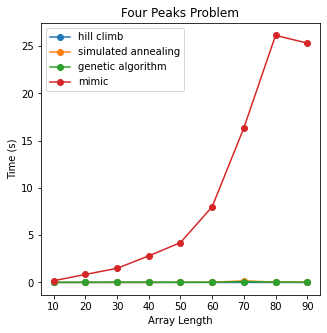

In [6]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(point_range, fp_hill_times, 'o-', point_range, fp_anneal_times, 'o-', point_range, fp_genetic_times, 'o-', point_range, fp_mimic_times, 'o-')
plt.title("Four Peaks Problem")
plt.xlabel("Array Length")
plt.ylabel("Time (s)")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

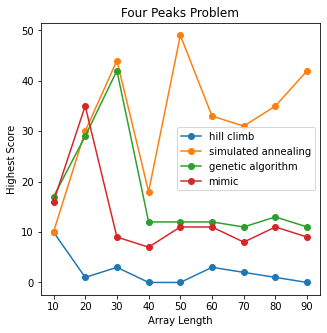

In [7]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(point_range, fp_hill_scores, 'o-', point_range, fp_anneal_scores, 'o-', point_range, fp_genetic_scores, 'o-', point_range, fp_mimic_scores, 'o-')
plt.title("Four Peaks Problem")
plt.xlabel("Array Length")
plt.ylabel("Highest Score")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

## Travelling Salesman Problem

In [8]:
tp_hill_times = []
tp_hill_scores = []
tp_anneal_times = []
tp_anneal_scores = []
tp_genetic_times = []
tp_genetic_scores = []
tp_mimic_times = []
tp_mimic_scores = []

In [9]:
def run_tsp(num_points):
    dist_list = []
    
    for x in range(num_points):
        for y in range(num_points):
            random.seed(x + y)
            dist_list.append((x, y, random.uniform(0.0, 1.0)))
    fitness_dists = mlrose.TravellingSales(distances=dist_list)
    tsp_problem = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_dists, maximize=False)
    print("Traveling Salesman Problem with {} points".format(num_points))
    train_and_time(lambda:mlrose.random_hill_climb(problem=tsp_problem, max_attempts=1), tp_hill_times, tp_hill_scores)
    train_and_time(lambda:mlrose.simulated_annealing(problem=tsp_problem, max_attempts=1), tp_anneal_times, tp_anneal_scores)
    train_and_time(lambda:mlrose.genetic_alg(pop_size=30, problem=tsp_problem, max_attempts=1), tp_genetic_times, tp_genetic_scores)
    train_and_time(lambda:mlrose.mimic(pop_size=30, problem=tsp_problem, max_attempts=1), tp_mimic_times, tp_mimic_scores)

In [10]:
tp_point_range = range(10, 50, 10)
for p in tp_point_range:
    run_tsp(p)

Traveling Salesman Problem with 10 points
Traveling Salesman Problem with 20 points
Traveling Salesman Problem with 30 points
Traveling Salesman Problem with 40 points


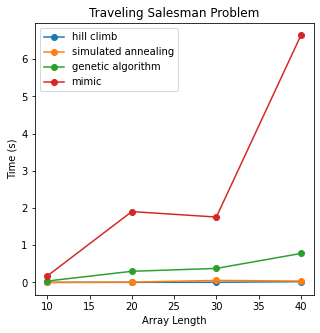

In [11]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(tp_point_range, tp_hill_times, 'o-', tp_point_range, tp_anneal_times, 'o-', tp_point_range, tp_genetic_times, 'o-', tp_point_range, tp_mimic_times, 'o-')
plt.title("Traveling Salesman Problem")
plt.xlabel("Array Length")
plt.ylabel("Time (s)")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

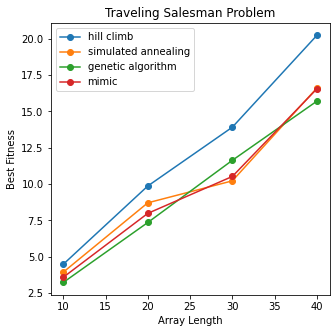

In [12]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(tp_point_range, tp_hill_scores, 'o-', tp_point_range, tp_anneal_scores, 'o-', tp_point_range, tp_genetic_scores, 'o-', tp_point_range, tp_mimic_scores, 'o-')
plt.title("Traveling Salesman Problem")
plt.xlabel("Array Length")
plt.ylabel("Best Fitness")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

## Flip Flop Problem

In [13]:
ff_hill_times = []
ff_hill_scores = []
ff_anneal_times = []
ff_anneal_scores = []
ff_genetic_times = []
ff_genetic_scores = []
ff_mimic_times = []
ff_mimic_scores = []

In [14]:
def run_flip_flop(num_points):
    flip_flop = mlrose.DiscreteOpt(length=num_points, fitness_fn=mlrose.FlipFlop(), max_val=2)
    print("Flip Flop Problem with {} points".format(num_points))
    train_and_time(lambda:mlrose.random_hill_climb(problem=flip_flop), ff_hill_times, ff_hill_scores)
    train_and_time(lambda:mlrose.simulated_annealing(problem=flip_flop), ff_anneal_times, ff_anneal_scores)
    train_and_time(lambda:mlrose.genetic_alg(problem=flip_flop), ff_genetic_times, ff_genetic_scores)
    train_and_time(lambda:mlrose.mimic(problem=flip_flop, max_iters=100),  ff_mimic_times, ff_mimic_scores)

In [15]:
ff_point_range = range(10, 100, 10)
for p in ff_point_range:
    run_flip_flop(p)

Flip Flop Problem with 10 points
Flip Flop Problem with 20 points
Flip Flop Problem with 30 points
Flip Flop Problem with 40 points
Flip Flop Problem with 50 points
Flip Flop Problem with 60 points
Flip Flop Problem with 70 points
Flip Flop Problem with 80 points
Flip Flop Problem with 90 points


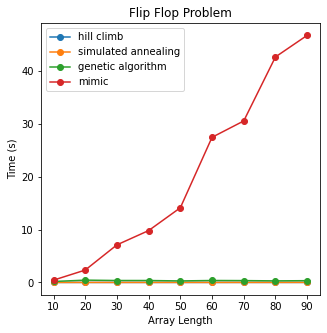

In [16]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(ff_point_range, ff_hill_times, 'o-', ff_point_range, ff_anneal_times, 'o-', ff_point_range, ff_genetic_times, 'o-', ff_point_range, ff_mimic_times, 'o-')
plt.title("Flip Flop Problem")
plt.xlabel("Array Length")
plt.ylabel("Time (s)")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

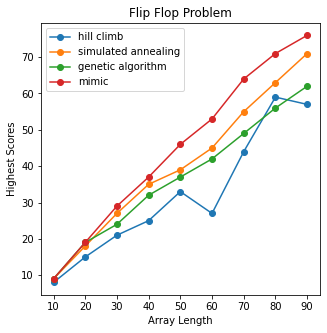

In [17]:
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(ff_point_range, ff_hill_scores, 'o-', ff_point_range, ff_anneal_scores, 'o-', ff_point_range, ff_genetic_scores, 'o-', ff_point_range, ff_mimic_scores, 'o-')
plt.title("Flip Flop Problem")
plt.xlabel("Array Length")
plt.ylabel("Highest Scores")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "mimic"])

# Part II: Neural Network Weights Optimization

In [18]:
# loading breast cancer dataset
bc_dataset = pd.read_csv("../data/breast_cancer_dataset.csv")
bc_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
## prepare data
# Map diagnosis column to integer value: 0, 1
data = bc_dataset.copy()
data["diagnosis"] = bc_dataset["diagnosis"].map({"M": 1, "B":0})

X = data.drop(['diagnosis'], axis=1)
y = to_categorical(data.diagnosis.values)



In [20]:
# shuffle to avoid underlying distributions
X, y = shuffle(X, y, random_state=26)
# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# Scale the X_train and X_test
X_train = scale(X_train)
X_test = scale(X_test)

In [29]:
# util functions
def randomized_train_nn(rando_algo, train_x, train_y, test_x, test_y, train_accuracies, test_accuracies, times, max_iters=1000, max_attempts=3,
                       early_stopping=False, mutation_prob=0.1, hidden_nodes=[64], pop_size=200, to_print=False):
    nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_nodes, activation="relu", algorithm=rando_algo, max_iters=max_iters,
                                   max_attempts=max_attempts, random_state=3, curve=True,early_stopping=early_stopping, mutation_prob=
                                   mutation_prob, pop_size=pop_size)
    start = time.perf_counter()
    nn_model.fit(train_x, train_y)
    end = time.perf_counter()
    time_elapsed = end - start
    y_train_pred = nn_model.predict(train_x)
    y_train_accuracy = accuracy_score(train_y, y_train_pred)
    y_test_pred = nn_model.predict(test_x)
    y_test_accuracy = accuracy_score(test_y, y_test_pred)
    
    train_accuracies.append(y_train_accuracy)
    test_accuracies.append(y_test_accuracy)
    times.append(time_elapsed)
    
    if to_print:
        print(classification_report(test_y, y_test_pred))
        print(confusion_matrix(test_y.argmax(axis=1), y_test_pred.argmax(axis=1)))
        print("{0} y test accuracy: {1}".format(rando_algo,y_test_accuracy))
        print("{0} time elapsed: {1}".format(rando_algo,time_elapsed))
    return nn_model
    
def iterative_train(times, train_accuracies, test_accuracies, iters_range, problem_text, early_stopping=False, mutation_prob=0.1):
    nn_model = None;
    for i in iters_range:
        nn_model = randomized_train_nn(problem_text, X_train, y_train, X_test, y_test, train_accuracies, test_accuracies, times, i,
                                      early_stopping=early_stopping, mutation_prob=mutation_prob)
    plt.plot(iters_range, times, 'o-')
    plt.title("Neural Net Training Time over {}".format(problem_text))
    plt.xlabel("Number of iterations")
    plt.ylabel("Time")
    plt.show()
    
    plt.plot(iters_range, train_accuracies, 'o-', iters_range, test_accuracies)
    plt.title("Neural Net Test Accuracy over {}".format(problem_text))
    plt.xlabel("Number of iterations")
    plt.ylabel("Accuracy")
    plt.legend(["train", "test"])
    plt.show()
    return nn_model
    
  

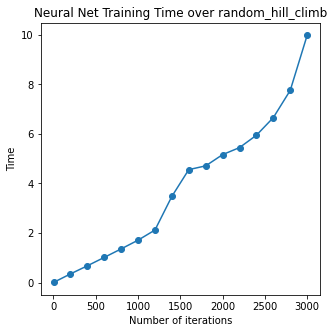

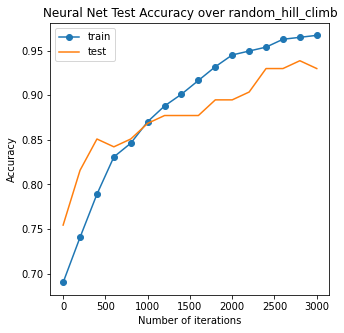

NeuralNetwork(hidden_nodes=[64], max_iters=3001)

In [30]:
nn_hc_times=[]
nn_hc_train_acc = []
nn_hc_test_acc = []
iters_range = range(1,3200, 200)
iterative_train(nn_hc_times, nn_hc_train_acc, nn_hc_test_acc, iters_range, "random_hill_climb")

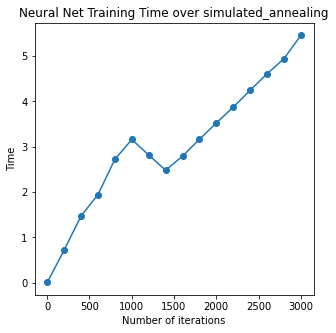

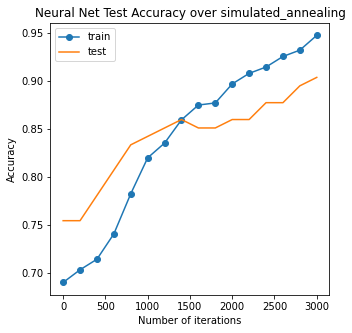

NeuralNetwork(hidden_nodes=[64], max_iters=3001)

In [31]:
nn_sa_times=[]
nn_sa_train_acc = []
nn_sa_test_acc = []
iters_range = range(1, 3200, 200)
iterative_train(nn_sa_times, nn_sa_train_acc, nn_sa_test_acc, iters_range, "simulated_annealing")

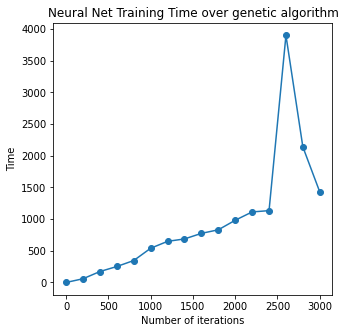

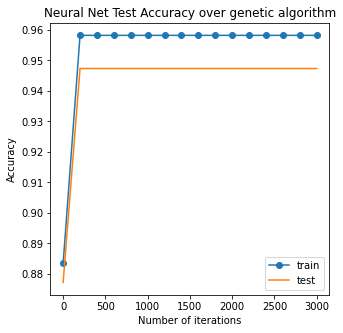

In [32]:
nn_ga_times=[]
nn_ga_train_acc = []
nn_ga_test_acc = []
iters_range = range(1, 3200, 200)
for i in iters_range:
    ga_nn = randomized_train_nn("genetic_alg", X_train, y_train, X_test, y_test, nn_ga_train_acc, nn_ga_test_acc, nn_ga_times,
                            max_iters=i, early_stopping=False, mutation_prob=.1, hidden_nodes=[64], pop_size=200, 
                            max_attempts=3,to_print=False)


plt.plot(iters_range, nn_ga_times, 'o-')
plt.title("Neural Net Training Time over genetic algorithm")
plt.xlabel("Number of iterations")
plt.ylabel("Time")
plt.show()
    
plt.plot(iters_range, nn_ga_train_acc, 'o-', iters_range, nn_ga_test_acc)
plt.title("Neural Net Test Accuracy over genetic algorithm")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend(["train", "test"])
plt.show()

In [35]:
# Train a neural network using stachastic gradient descent
from sklearn.neural_network import MLPClassifier

In [37]:
nn_sgd_times=[]
nn_sgd_train_acc = []
nn_sgd_test_acc = []
iters_range = range(1, 3200, 200)
for i in iters_range:
    mlp = MLPClassifier(solver="sgd", activation="relu", random_state=0, hidden_layer_sizes=[64], max_iter=i)
    start = time.perf_counter()
    mlp.fit(X_train, y_train)
    end = time.perf_counter()
    elapsed_time = end - start
    
    y_train_pred = mlp.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = mlp.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    nn_sgd_times.append(elapsed_time)
    nn_sgd_train_acc.append(y_train_accuracy)
    nn_sgd_test_acc.append(y_test_accuracy)

d:\python_projects\cs7641_hw2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python_projects\cs7641_hw2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\python_projects\cs7641_hw2\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (401) reached and the optimization hasn't converged yet.
  warnings.warn(


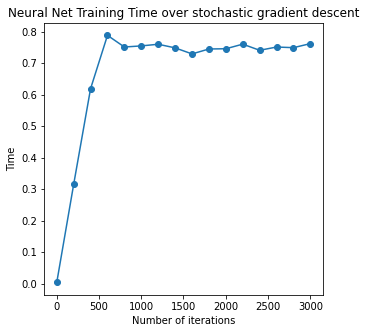

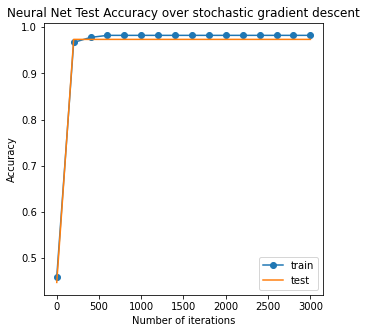

In [45]:
# plot runniing time against number of iteration, accuracy against number of iteration
plt.plot(iters_range, nn_sgd_times, 'o-')
plt.title("Neural Net Training Time over stochastic gradient descent")
plt.xlabel("Number of iterations")
plt.ylabel("Time")
plt.show()
    
plt.plot(iters_range, nn_sgd_train_acc, 'o-', iters_range, nn_sgd_test_acc)
plt.title("Neural Net Test Accuracy over stochastic gradient descent")
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.legend(["train", "test"])
plt.show()

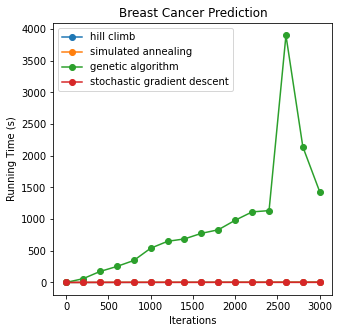

In [46]:
# plot running time againt number of iteration
iter_num = range(1, 3200, 200)
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(iter_num, nn_hc_times, 'o-', iter_num, nn_sa_times, 'o-', iter_num, nn_ga_times, 'o-', iter_num, nn_sgd_times, 'o-')
plt.title("Breast Cancer Prediction")
plt.xlabel("Iterations")
plt.ylabel("Running Time (s)")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "stochastic gradient descent"])

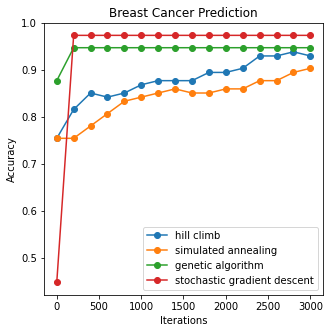

In [47]:
# plot running time againt number of iteration
iter_num = range(1, 3200, 200)
plt.rcParams["figure.figsize"] = (5, 5)
plt.plot(iter_num, nn_hc_test_acc, 'o-', iter_num, nn_sa_test_acc, 'o-', iter_num, nn_ga_test_acc, 'o-', iter_num, nn_sgd_test_acc, 'o-')
plt.title("Breast Cancer Prediction")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(["hill climb", "simulated annealing", "genetic algorithm", "stochastic gradient descent"])